In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
#Load in dataset
insitu_df = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/beltsville_usc00180700_ghcn_2000-2023.csv')

#FOrmat dataset
insitu_df = insitu_df[8:]
insitu_df.columns
insitu_df = insitu_df.rename(columns={" Daily Surface Air Temperatures (deg F) in " : "date", "Unnamed: 1": "Tmax", "Unnamed: 2": "Tmin", "Unnamed: 3" : "avg"})
insitu_df['date'] = pd.to_datetime(insitu_df['date'], format='%m/%d/%Y')
insitu_df['Tmax'] = insitu_df['Tmax'].astype(float)
insitu_df['Tmin'] = insitu_df['Tmin'].astype(float)
insitu_df['avg'] = insitu_df['avg'].astype(float)

#Remove outliers
insitu_df = insitu_df[insitu_df['Tmax'] >=-10] #remove outliers
insitu_df_daily = insitu_df
insitu_df['month'] = insitu_df['date'].dt.month
insitu_df['year'] = insitu_df['date'].dt.year
insitu_df.head()

,date,Tmax,Tmin,avg,month,year
8,2000-01-01,55.0,27.0,41.0,1,2000
9,2000-01-02,52.0,27.0,39.5,1,2000
10,2000-01-03,67.0,48.0,57.5,1,2000
11,2000-01-04,67.0,57.0,62.0,1,2000
12,2000-01-05,69.0,36.0,52.5,1,2000


In [91]:
#calculate monthly averages
insitu_monthly = insitu_df.groupby(['month','year']).mean()
insitu_monthlySTD = insitu_df.groupby(['month','year']).std()
insitu_monthly.reset_index(inplace=True)
insitu_monthlySTD.reset_index(inplace=True)
insitu_monthly['date'] = pd.to_datetime(insitu_monthly['year'].astype(str) + insitu_monthly['month'].astype(str) + str(1), format='%Y%m%d')
insitu_monthlySTD['date'] = pd.to_datetime(insitu_monthlySTD['year'].astype(str) + insitu_monthlySTD['month'].astype(str) + str(1), format='%Y%m%d')
insitu_monthly = insitu_monthly.sort_values(by='date')
insitu_monthlySTD = insitu_monthlySTD.sort_values(by='date')

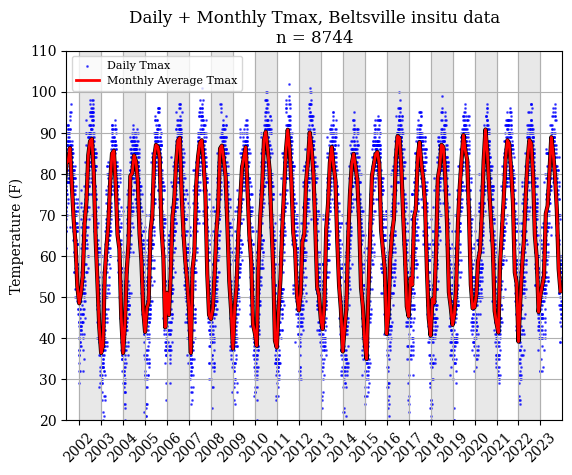

In [92]:
#Make the plot
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

plt.grid()
plt.ylabel(f'Temperature (F)')
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=3, c = 'black')
plt.scatter(insitu_df['date'], insitu_df['Tmax'],s=1, c = 'blue', alpha = 0.6,label = 'Daily Tmax')
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=2, c = 'red', label = 'Monthly Average Tmax')

#plt.fill_between(insitu_monthlySTD['date'], insitu_monthly['Tmax'] + insitu_monthlySTD['Tmax'],  insitu_monthly['Tmax'] - insitu_monthlySTD['Tmax'], color='blue', alpha=0.3, label='Std. deviation')

plt.title(f'Daily + Monthly Tmax, Beltsville insitu data\nn = {len(insitu_df)}')
plt.ylim(20,110)
from matplotlib.dates import YearLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.xlim(pd.Timestamp(2001, 6, 1), pd.Timestamp(2023, 12, 31))
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

## Plot MODIS LST climatology

In [93]:
#Day and Night climatology
#CLIMATOLOGY
loc = 'All'
tods = ['Day', 'Night']
TOD = tods[0]

#Load in the file
import pandas as pd
currentDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_{loc}.csv')
cropped_df = currentDf.dropna(subset = 'average')
cropped_df = cropped_df.rename(columns={'time': 'ID'})
lookupDf = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/{TOD}time.csv')
df_merged1 = cropped_df.merge(lookupDf, on='ID', how='left')
df_merged1['date'] = pd.to_datetime(df_merged1['time'])
df_merged = df_merged1

#Format the values
df_merged = df_merged.sort_values(by='date')
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['stdUpper'] = (df_merged['std'] + df_merged['average'])
df_merged['stdLower'] = (df_merged['average'] - df_merged['std'])
df_merged['average'] = (df_merged['average'] - 273.15) * 9/5 + 32
df_merged['stdUpper'] = (df_merged['stdUpper'] - 273.15) * 9/5 + 32
df_merged['stdLower'] = (df_merged['stdLower'] - 273.15) * 9/5 + 32
df_merged['std'] = df_merged['stdUpper'] - df_merged['stdLower']
df_merged.head()

,Unnamed: 0_x,ID,average,std,x,y,Unnamed: 0.3,Unnamed: 0.1,index,Unnamed: 0_y,OBJECTID,time,time_1,Unnamed: 0.2,level_0,date,month,year,stdUpper,stdLower
2454,3835,0Day1.tif_JJA_Day,96.837396,13.394425,-76.87789,38.833332,2682,0,0,0,1,7/4/2002,7/4/2002,NaN,NaN,2002-07-04,7,2002,103.534609,90.140183
3319,4928,1Day1.tif_JJA_Day,104.927704,11.097978,-76.87789,38.833332,2683,1,1,1,2,7/5/2002,7/5/2002,NaN,NaN,2002-07-05,7,2002,110.476692,99.378715
3405,5039,2Day1.tif_JJA_Day,89.575300,8.188486,-76.87789,38.833332,2684,2,2,2,3,7/6/2002,7/6/2002,NaN,NaN,2002-07-06,7,2002,93.669543,85.481057
3494,5150,3Day1.tif_JJA_Day,87.430609,8.184766,-76.87789,38.833332,2685,3,3,3,4,7/7/2002,7/7/2002,NaN,NaN,2002-07-07,7,2002,91.522992,83.338226
3666,5372,5Day1.tif_JJA_Day,95.094137,8.877120,-76.87789,38.833332,2687,5,5,5,6,7/9/2002,7/9/2002,NaN,NaN,2002-07-09,7,2002,99.532697,90.655577


In [94]:
df_merged.head()
df_merged_crop = df_merged[['average','stdUpper','stdLower','month','year']]
df_merged_crop.dtypes
dfMonthlies = df_merged_crop.groupby(['year', 'month']).mean().reset_index()
dfMonthliesSTD = df_merged_crop.groupby(['year', 'month']).std().reset_index()
dfMonthlies.head()

,year,month,average,stdUpper,stdLower
0,2002,7,92.142480,96.511678,87.773283
1,2002,8,92.418831,96.746059,88.091603
2,2002,9,81.611984,85.345925,77.878043
3,2002,10,70.586213,73.630399,67.542026
4,2002,11,53.363670,55.946938,50.780402


In [95]:
#Format monthly averages
dfMonthlies['date'] = pd.to_datetime(dfMonthlies['year'].astype(str) + dfMonthlies['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthlies = dfMonthlies.sort_values(by='date')
dfMonthliesSTD['date'] = pd.to_datetime(dfMonthliesSTD['year'].astype(str) + dfMonthliesSTD['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthliesSTD = dfMonthliesSTD.sort_values(by='date')

#Get 20 year climatology
median_df = dfMonthlies.groupby(['month']).mean()
median_df.reset_index(inplace=True)
median_df['date'] = pd.to_datetime(str(year_all[0]) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
median_df_store = median_df
for year in year_all[1:]:#Add to it and plot
    median_df_store['date'] = pd.to_datetime(str(year) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
    median_df = pd.concat([median_df, median_df_store], ignore_index = True)
median_df = median_df.sort_values(by='date')
subtracted_df = dfMonthlies - median_df

<Figure size 1000x600 with 0 Axes>

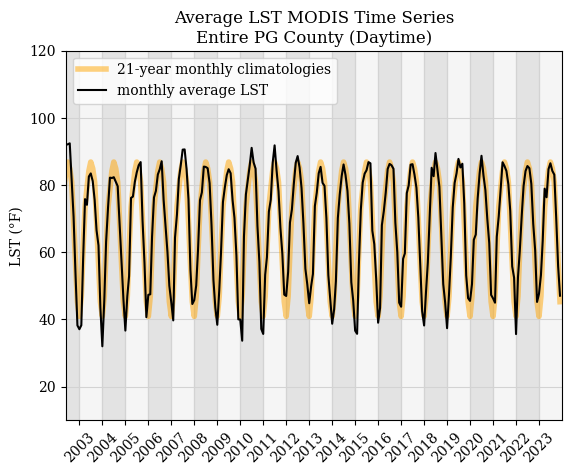

In [96]:
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]

plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)


#plot climatologies
plt.plot(median_df['date'], median_df['average'],c='orange', lw = 4, linestyle = '-', alpha = 0.5, label = '21-year monthly climatologies')

#Plot everything 
#plt.plot(df_merged['date'], df_merged['average'])

#plot monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'black', label = 'monthly average LST')

#try:plt.fill_between(dfMonthliesSTD['date'], dfMonthlies['average'] + dfMonthliesSTD['average'],  dfMonthlies['average'] - dfMonthliesSTD['average'], color='blue', alpha=0.3, label='Std. deviation')
#except: print('no std')

#format
plt.title(f'Average LST MODIS Time Series\nEntire PG County ({TOD}time)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('LST (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(10,120)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_Climatology.png', format='png', dpi=300)
plt.show()

## Plot insitu vs MODIS LST

<Figure size 1000x600 with 0 Axes>

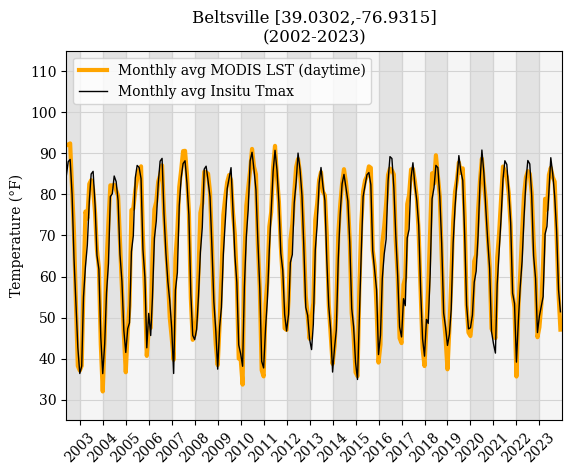

In [154]:
#Make plots - Monthly average
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#plot Dailies
#plt.scatter(df_MODIS_daily['date'], df_MODIS_daily['average'], s=3, c = 'orange', label = 'Daily Beltsville MODIS LST (daytime)', zorder = 1, lw = 3)
#plt.scatter(insitu_df_daily['date'], insitu_df_daily['Tmax'],s = 1, c = 'black',  label = 'Daily Beltsville Insitu Tmax', zorder = 2, alpha = 1)

# Plot Monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'orange', label = 'Monthly avg MODIS LST (daytime)', lw = 3)
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=1, c = 'black', label = 'Monthly avg Insitu Tmax', alpha = 1)
insitu_beltsville_monthly = insitu_monthly

#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
#try:plt.fill_between(dfMonthliesSTD['date'], dfMonthlies['average'] + dfMonthliesSTD['average'],  dfMonthlies['average'] - dfMonthliesSTD['average'], color='blue', alpha=0.2, label='Std. deviation')
#except: print('no std')
#plt.fill_between(insitu_monthlySTD['date'], insitu_monthly['Tmax'] + insitu_monthlySTD['Tmax'],  insitu_monthly['Tmax'] - insitu_monthlySTD['Tmax'], color='blue', alpha=0.3, label='Std. deviation')


#format
plt.title(f'Beltsville [39.0302,-76.9315]\n(2002-2023)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(25,115)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_monthly_overlay_BELTSVILLE.png', format='png', dpi=300)
plt.show()

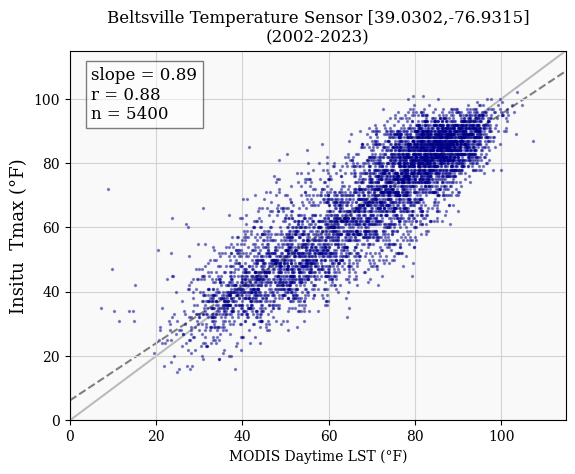

In [155]:
#Scatterplot
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams

#Set font to Times New Roman
rcParams['font.family'] = 'serif'

from scipy.stats import linregress
merged_df = pd.merge(df_merged, insitu_df_daily, on='date', how='inner')
plt.grid(zorder = 1, c = 'lightgrey')
plt.axvspan(0,150, color='whitesmoke', alpha=0.5)
plt.scatter(merged_df['average'], merged_df['Tmax'],zorder = 2, s = 2, c = 'darkblue', alpha = .4)
plt.ylabel('Insitu  Tmax (°F)',fontsize = 13)
plt.xlabel('MODIS Daytime LST (°F)')
#linregreess
slope, intercept, r_value, p_value, std_err = linregress(merged_df['average'], merged_df['Tmax'])
x_range = pd.Series([0, 150])
y_values = intercept + slope * x_range
plt.plot(x_range, y_values, color='grey', linestyle = '--', label=f'Linear regression line (y={slope:.2f}x+{intercept:.2f})',zorder = 1)

#plot slope line
plt.plot([0, 150], [0, 150], color='grey', linestyle='-',zorder = 0)
cleaned_df = merged_df.dropna(subset=['Tmax', 'average'])

# get len of non-nan entries
count = len(cleaned_df)
plt.title('Beltsville Temperature Sensor [39.0302,-76.9315]\n(2002-2023)')
textstr = f'slope = {slope:.2f}\nr = {r_value:.2f}\nn = {len(cleaned_df)}'
plt.text(5, 110, textstr, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

#plt.ylim(30,95)
plt.xlim(0,115)
plt.ylim(0,115)
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_daily_validation_BELTSVILLE.png', format='png', dpi=300)

# Repeat for 3 locations
https://www.ncei.noaa.gov/cdo-web/z

In [89]:
#Load in insitu data
import pandas as pd
#Load in dataset
#insitu_df = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Insitu/NCEI_airTemp/NCEI_airTemp_PGCounty.csv')
#insitu_df = pd.read_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Insitu/NCEI_airTemp/NCEI_airTemp_MARLBORO.csv')

insitu_df.head()

,Daily Surface Air Temperatures (deg F) in,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,Beltsville,Priince Georde's County,Maryland,NaN
1,Climate Division: 04,NaN,NaN,NaN
2,Lat,Lon: \t 39.0302,-76.9315,NaN
3,Elevation (ft): 145,NaN,NaN,NaN
4,Station ID: 180700,NWS Coop Number,NaN,NaN


In [63]:
#Split datasets by location
brandywine_df = insitu_df[insitu_df['NAME'] == 'BRANDYWINE 6.7 ESE, MD US'].reset_index()
oxon_hill_df = insitu_df[insitu_df['NAME'] == 'OXON HILL, MD US'].reset_index()
bowie_df = insitu_df[insitu_df['NAME'] == 'BOWIE 2.8 WNW, MD US'].reset_index()
marlboro_df = insitu_df.reset_index()

#Coordinates
coord_dict = {'Oxon Hill' : [38.7955, -76.99481],
              'Bowie' : [38.981064, -76.78107],
              'Brandywine' : [38.665455, -76.739766],
             'Marlboro' : [38.8519,	-76.7683]}

In [64]:
#Format the dataset
def format_inSitu(insitu_df):
    #Reformat temps
    insitu_df['Tmax'] = insitu_df['TMAX'].astype(float)
    insitu_df['Tmin'] = insitu_df['TMIN'].astype(float)
    insitu_df['date'] = pd.to_datetime(insitu_df['DATE'])

    #remove ouitliers
    insitu_df = insitu_df[insitu_df['Tmax'] >=-10] #remove outliers

    #Date
    insitu_df['DATE'] = pd.to_datetime(insitu_df['DATE'])
    insitu_df.loc[:, 'DATE'] = pd.to_datetime(insitu_df['DATE'])
    insitu_df.loc[:, 'month'] = insitu_df['DATE'].dt.month
    insitu_df.loc[:, 'year'] = insitu_df['DATE'].dt.year
    return(insitu_df)

#Format dfs
bowie_df = format_inSitu(bowie_df)
oxon_hill_df = format_inSitu(oxon_hill_df)
brandywine_df = format_inSitu(brandywine_df)
marlboro_df = format_inSitu(marlboro_df)

/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_537141/2202740020.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insitu_df['DATE'] = pd.to_datetime(insitu_df['DATE'])
/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_537141/2202740020.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insitu_df.loc[:, 'month'] = insitu_df['DATE'].dt.month
/explore/nobackup/people/slsmit34/.nccstmp/ipykernel_537141/2202740020.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [65]:
#calculate monthly averages
def monthlyAverage(insitu_df):
    insitu_monthly = insitu_df.groupby(['month','year']).mean()
    insitu_monthlySTD = insitu_df.groupby(['month','year']).std()
    insitu_monthly.reset_index(inplace=True)
    insitu_monthlySTD.reset_index(inplace=True)
    insitu_monthly['date'] = pd.to_datetime(insitu_monthly['year'].astype(str) + insitu_monthly['month'].astype(str) + str(1), format='%Y%m%d')
    insitu_monthlySTD['date'] = pd.to_datetime(insitu_monthlySTD['year'].astype(str) + insitu_monthlySTD['month'].astype(str) + str(1), format='%Y%m%d')
    insitu_monthly = insitu_monthly.sort_values(by='date')
    insitu_monthlySTD = insitu_monthlySTD.sort_values(by='date')
    return(insitu_monthly, insitu_monthlySTD)

#Monthly avgs
oxon_hill_Monthlies = oxon_hill_df[['Tmax', 'month', 'year']]
oxon_hill_Monthlies, oxon_hill_MonthliesSTD = monthlyAverage(oxon_hill_Monthlies)

marlboro_Monthlies = marlboro_df[['Tmax', 'month', 'year']]
marlboro_Monthlies, marlboro_MonthliesSTD = monthlyAverage(marlboro_Monthlies)

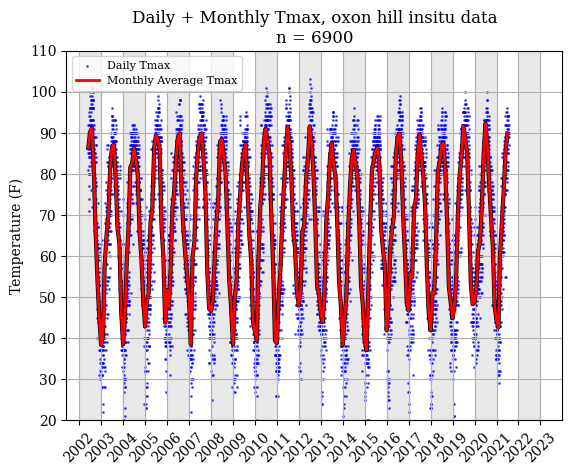

In [67]:
#Df to plot
insitu_monthly = oxon_hill_Monthlies
insitu_df = oxon_hill_df

#Make the plot
import matplotlib.pyplot as plt
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

plt.grid()
plt.ylabel(f'Temperature (F)')
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=3, c = 'black')
plt.scatter(insitu_df['date'], insitu_df['Tmax'],s=1, c = 'blue', alpha = 0.6,label = 'Daily Tmax')
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=2, c = 'red', label = 'Monthly Average Tmax')

#plt.fill_between(insitu_monthlySTD['date'], insitu_monthly['Tmax'] + insitu_monthlySTD['Tmax'],  insitu_monthly['Tmax'] - insitu_monthlySTD['Tmax'], color='blue', alpha=0.3, label='Std. deviation')

plt.title(f'Daily + Monthly Tmax, oxon hill insitu data\nn = {len(insitu_df)}')
plt.ylim(20,110)
from matplotlib.dates import YearLocator, DateFormatter
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.xlim(pd.Timestamp(2001, 6, 1), pd.Timestamp(2023, 12, 31))
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

## Get MODIS LST values at that coordinate

In [97]:
import xarray as xr

#Define file paths
TOD = 'Day'
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/seasonally/'
fnDec = f'{dirFn}Dec_682files_0{TOD}_9{TOD}.nc'
fnJF = f'{dirFn}JF_1238files_0{TOD}_9{TOD}.nc'

#open datasets
dsDec = xr.open_dataset(fnDec)
dsJF = xr.open_dataset(fnJF)

#format time dimension
def add_suffix(time_values, suffix):
    return [str(time) + suffix for time in time_values]

#apply suffixes
dsDec['time'] = add_suffix(dsDec['time'].values, '_DEC')
dsJF['time'] = add_suffix(dsJF['time'].values, '_JF')

#Merge datasets
dsDJF = xr.merge([dsDec, dsJF])
dsDJF['LST'][220]
dsDJF

<xarray.Dataset> Size: 57MB
Dimensions:      (x: 51, y: 72, time: 1920)
Coordinates:
  * x            (x) float64 408B -77.08 -77.07 -77.07 ... -76.69 -76.68 -76.67
  * y            (y) float64 576B 39.13 39.12 39.11 39.1 ... 38.56 38.55 38.54
  * time         (time) <U15 115kB '0Day1.tif_DEC' ... '9Day1.tif_JF'
    spatial_ref  int64 8B 0
Data variables:
    LST          (time, y, x) float64 56MB nan nan nan nan ... nan nan nan nan
Attributes: (12/14)
    AREA_OR_POINT:           Area
    BandName:                SelfBand
    RepresentationType:      ATHEMATIC
    STATISTICS_COVARIANCES:  0.7635604837032346
    STATISTICS_MAXIMUM:      279.52
    STATISTICS_MEAN:         277.20532846715
    ...                      ...
    STATISTICS_SKIPFACTORY:  1
    STATISTICS_STDDEV:       0.87381948004335
    _FillValue:              0.0
    scale_factor:            1.0
    add_offset:              0.0
    long_name:               SelfBand

In [98]:
# load in ds
def cropWindow(ds, lat, lon):
    # Find the nearest pixel indices
    lat_idx = ds.y.sel(y=lat, method='nearest').coords['y'].values.item()
    lon_idx = ds.x.sel(x=lon, method='nearest').coords['x'].values.item()

    #Find the index of the nearest pixel in the ds
    lat_idx = ds.y.to_index().get_loc(lat_idx)
    lon_idx = ds.x.to_index().get_loc(lon_idx)

    #outline the 3x3 window
    lat_start = max(0, lat_idx - 1)
    lat_end = min(len(ds.y) - 1, lat_idx + 1)
    lon_start = max(0, lon_idx - 1)
    lon_end = min(len(ds.x) - 1, lon_idx + 1)
    cropped_ds = ds.isel(y=slice(lat_start, lat_end + 1), x=slice(lon_start, lon_end + 1))
    return(cropped_ds)

In [99]:
TOD = 'Day'
dirFn = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/{TOD}/Composite/seasonally/'
fnMAM = f'{dirFn}MAM_1915files_0{TOD}_9{TOD}.nc'
fnSON = f'{dirFn}SON_2000files_0{TOD}_9{TOD}.nc'
fnJJA = f'{dirFn}JJA_1982files_0{TOD}_9{TOD}.nc'
ds = xr.open_dataset(fnMAM)

In [100]:
#dataframe
import pandas as pd
dsMAM = xr.open_dataset(fnMAM)
dsSON = xr.open_dataset(fnSON)
dsJJA = xr.open_dataset(fnJJA)

# Iterate through each time layer
def createDf(ds, average_values, season):
    for currentTime in ds.time:
        # Select the data for the current time layer
        time_layer = ds.sel(time=currentTime)
        # Calculate the average value of the time layer
        avg_value = time_layer['LST'].mean().item()
        std_value = time_layer['LST'].std().item()
        avg_x =  time_layer['x'].mean().item()
        avg_y = time_layer['y'].mean().item()
        # Store the result along with the time label
        average_values.append({'time': f'{currentTime.data}_{season}_{TOD}', 'average': avg_value, 'std': std_value, 'x': avg_x, 'y' : avg_y})
    return(average_values)

#Open each dataframe and append
average_values = []
dsYearly = [dsDJF, dsMAM, dsJJA, dsSON]
seasonYearly = ['DJF', 'MAM', 'JJA', 'SON']
i = 0
for ds in dsYearly:
    season = seasonYearly[i]
    print(f'processing {seasonYearly[i]}...')
    print(f'length DF: {len(average_values)}')
    
    #Select location
    #Oxon Hill
    #ds_Location = ds.sel(y=38.7955, x=-76.99481, method='nearest') #Oxon Hill

    #Beltsville
    ds_Location = ds.sel(y=39.0302, x=-76.9315, method='nearest') #Beltsville
    
    # Marlsboro
    #ds_Location = ds.sel(y = 38.8519,x = -76.7683, method = 'nearest') #Marlboro
    
    average_values = createDf(ds_Location, average_values, season)
    i = i+1

avg_df = pd.DataFrame(average_values)
avg_df.to_csv(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/{TOD}_Marlboro.csv')

processing DJF...
length DF: 0
processing MAM...
length DF: 1920
processing JJA...
length DF: 3835
processing SON...
length DF: 5817


[38.7955, -76.99481]


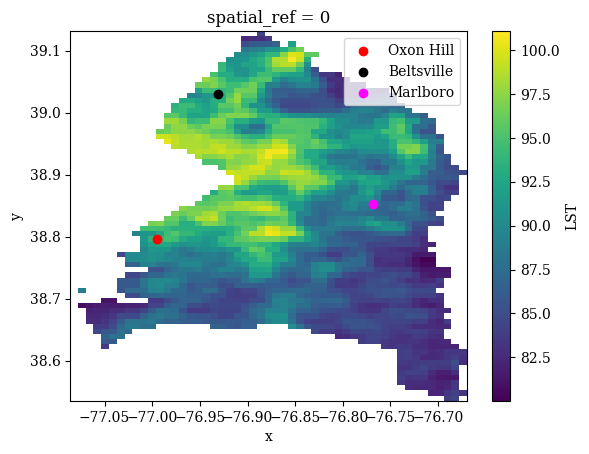

In [102]:
JJA_mean = dsJJA['LST'].mean(dim='time')
JJA_mean = (JJA_mean- 273.15) * 9/5 + 32
JJA_mean.plot()
print(coord_dict['Oxon Hill']) 
plt.scatter(-76.99481,38.7955, c = 'r', label = 'Oxon Hill')
plt.scatter(-76.9315, 39.0302,c = 'black', label = 'Beltsville')
plt.scatter(-76.7683, 38.8519, c = 'Fuchsia', label = 'Marlboro')
plt.legend()

Day





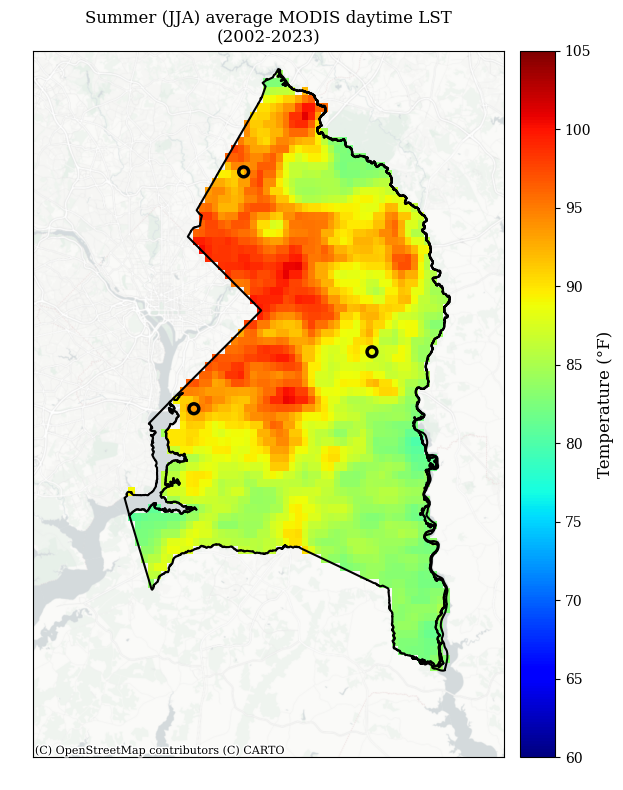

In [103]:
# With basemap: 
#DAY
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import contextily as cx
from matplotlib_scalebar.scalebar import ScaleBar
TOD='Day'
print(TOD)
print('\n\n')

# Define custom color scale
colors = ['black', 'blue', 'greenyellow', 'lemonchiffon', 'darkorange', 'firebrick', 'darkmagenta']
#cmap = mcolors.LinearSegmentedColormap.from_list('custom_heatmap', colors)
cmap = 'jet'

# Plot
fig, ax = plt.subplots(figsize=(8,8))
ax.set_facecolor('white')

# Plot the dataset using custom colormap
im = JJA_mean.plot(ax=ax, cmap=cmap, vmin=60, vmax=105, add_colorbar=False)

# Add shapefile boundary
shapefile_path = r"/panfs/ccds02/nobackup/people/slsmit34/shapefiles/md_pgCounty/County_Boundary_Py.shp"
gdf2 = gpd.read_file(shapefile_path)
gdf2 = gdf2.to_crs("EPSG:4326")
gdf2.boundary.plot(ax=ax, edgecolor='black', alpha=1, lw = 1.5)

plt.ylim(38.45, 39.15)
plt.xlim(-77.2, -76.6)

# Add basemap
#cx.add_basemap(ax, crs=composite_mean.rio.crs.to_string(), source=cx.providers.OpenStreetMap.BlackAndWhite)
cx.add_basemap(ax, crs="EPSG:4326", source=cx.providers.CartoDB.PositronNoLabels)

# Add colorbar
cbar = fig.colorbar(im, ax=ax, orientation='vertical', pad=0.02)
cbar.set_label('Temperature (°F)', fontsize=12)
#cbar.ax.tick_params(labelsize=10)

# Set labels and grid
ax.set_xlabel(' ', fontsize=12)
ax.set_ylabel(' ', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5)

# Title (optional)
ax.set_title('    ', fontsize=14)
props = dict(boxstyle='round', facecolor='whitesmoke', alpha=0.5)
ax.set_xticks([])
ax.set_yticks([])

# Export as png
plt.title('Summer (JJA) average MODIS daytime LST\n(2002-2023)')

coordDict = {
            'Oxon Hill': [38.7955,-76.99481],
            'Beltsville': [39.0302, -76.9315],
            'Marlboro': [38.8519,-76.7683]
        }
locKeys = ['Oxon Hill', 'Beltsville', 'Marlboro']
for locKey in locKeys:
    plt.scatter(coordDict[locKey][1], coordDict[locKey][0], label = coordDict[locKey], edgecolors = 'black', s = 50, linewidth = 2.5,  facecolor = 'none')
    #plt.scatter(coordDict[locKey][1], coordDict[locKey][0], label = coordDict[locKey], edgecolors = 'white', s = 55,  facecolor = 'none')

output_filename =  f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/JJA_avgLST_map_locPoints.png'
plt.savefig(output_filename, format='png', dpi = 300)
plt.tight_layout()
plt.show()

In [104]:
#Label with dates
direc = f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/lookUp/'
TOD = 'Day'
df_dates = pd.read_csv(f'{direc}{TOD}time.csv')
merged_df = pd.merge(avg_df, df_dates[['ID', 'time']], left_on='time', right_on='ID', how='left')
# Rename the 'time_y' column to 'date' and drop the unnecessary columns
merged_df = merged_df.rename(columns={'time_y': 'date'}).drop(columns=['ID', 'time_x'])
merged_df['date'] = pd.to_datetime(merged_df['date'])
df_merged = merged_df
merged_df.head()

,average,std,x,y,date
0,277.16,0.0,-76.935091,39.027834,2002-12-01
1,NaN,NaN,-76.935091,39.027834,2003-01-01
2,284.52,0.0,-76.935091,39.027834,2019-02-26
3,NaN,NaN,-76.935091,39.027834,2019-02-27
4,287.84,0.0,-76.935091,39.027834,2019-02-28


In [105]:
#Format the values
df_merged = df_merged.sort_values(by='date')
df_merged['month'] = df_merged['date'].dt.month
df_merged['year'] = df_merged['date'].dt.year
df_merged['stdUpper'] = (df_merged['std'] + df_merged['average'])
df_merged['stdLower'] = (df_merged['average'] - df_merged['std'])
df_merged['average'] = (df_merged['average'] - 273.15) * 9/5 + 32
df_merged['stdUpper'] = (df_merged['stdUpper'] - 273.15) * 9/5 + 32
df_merged['stdLower'] = (df_merged['stdLower'] - 273.15) * 9/5 + 32
df_merged['std'] = df_merged['stdUpper'] - df_merged['stdLower']
df_merged.head()

,average,std,x,y,date,month,year,stdUpper,stdLower
3835,102.722,0.0,-76.935091,39.027834,2002-07-04,7,2002,102.722,102.722
4928,105.710,0.0,-76.935091,39.027834,2002-07-05,7,2002,105.710,105.710
5039,91.166,0.0,-76.935091,39.027834,2002-07-06,7,2002,91.166,91.166
5150,NaN,NaN,-76.935091,39.027834,2002-07-07,7,2002,NaN,NaN
5261,NaN,NaN,-76.935091,39.027834,2002-07-08,7,2002,NaN,NaN


In [106]:
df_merged.head()
df_merged_crop = df_merged[['average','stdUpper','stdLower','month','year']]
df_merged_crop.dtypes
dfMonthlies = df_merged_crop.groupby(['year', 'month']).mean().reset_index()
dfMonthliesSTD = df_merged_crop.groupby(['year', 'month']).std().reset_index()
dfMonthlies.head()

,year,month,average,stdUpper,stdLower
0,2002,7,98.010000,98.010000,98.010000
1,2002,8,97.399143,97.399143,97.399143
2,2002,9,86.635538,86.635538,86.635538
3,2002,10,74.889500,74.889500,74.889500
4,2002,11,54.579200,54.579200,54.579200


In [107]:
#Format monthly averages
year_all = [year for year in range(2001, 2024)]
dfMonthlies['date'] = pd.to_datetime(dfMonthlies['year'].astype(str) + dfMonthlies['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthlies = dfMonthlies.sort_values(by='date')
dfMonthliesSTD['date'] = pd.to_datetime(dfMonthliesSTD['year'].astype(str) + dfMonthliesSTD['month'].astype(str) + str(1), format='%Y%m%d')
dfMonthliesSTD = dfMonthliesSTD.sort_values(by='date')

#Get 20 year climatology
median_df = dfMonthlies.groupby(['month']).mean()
median_df.reset_index(inplace=True)
median_df['date'] = pd.to_datetime(str(year_all[0]) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
median_df_store = median_df
for year in year_all[1:]:#Add to it and plot
    median_df_store['date'] = pd.to_datetime(str(year) + median_df['month'].astype(str) + str(1), format='%Y%m%d')
    median_df = pd.concat([median_df, median_df_store], ignore_index = True)
median_df = median_df.sort_values(by='date')
subtracted_df = dfMonthlies - median_df

<Figure size 1000x600 with 0 Axes>

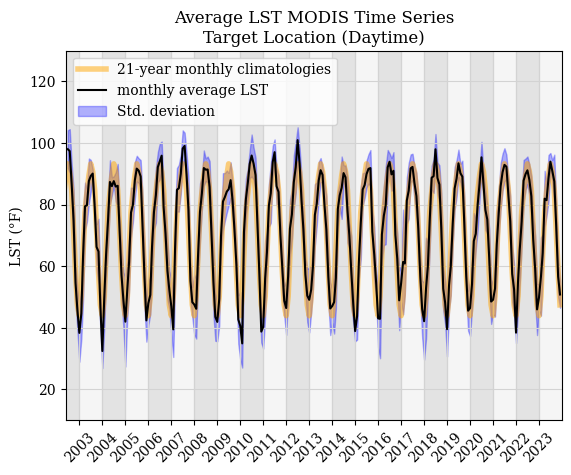

In [108]:
from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
year_all = [year for year in range(2001, 2024)]

plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)


#plot climatologies
plt.plot(median_df['date'], median_df['average'],c='orange', lw = 4, linestyle = '-', alpha = 0.5, label = '21-year monthly climatologies')

#Plot everything 
#plt.plot(df_merged['date'], df_merged['average'])

#plot monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'black', label = 'monthly average LST')

#try:plt.fill_between(dfMonthlies['date'], dfMonthlies[f'stdUpper'], dfMonthlies[f'stdLower'], color='blue', alpha=0.3, label='Std. Deviation')
try:plt.fill_between(dfMonthliesSTD['date'], dfMonthlies['average'] + dfMonthliesSTD['average'],  dfMonthlies['average'] - dfMonthliesSTD['average'], color='blue', alpha=0.3, label='Std. deviation')
except: print('no std')

#format
plt.title(f'Average LST MODIS Time Series\nTarget Location ({TOD}time)')
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('LST (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(10,130)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_Climatology.png', format='png', dpi=300)
plt.show()

## Compare timeseries and plots

<Figure size 1000x600 with 0 Axes>

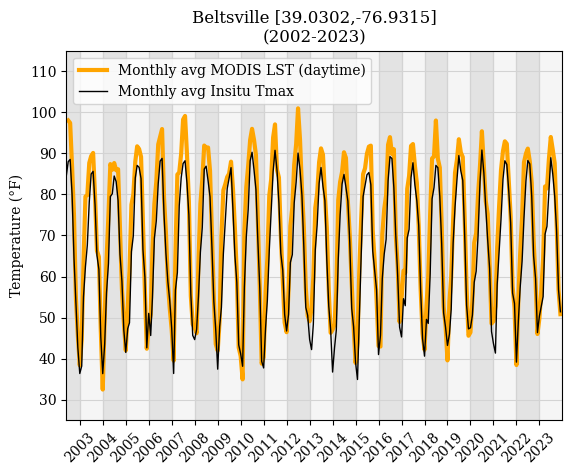

In [109]:
#Make plots - Monthly average

from matplotlib.dates import YearLocator, DateFormatter
plt.figure(figsize=(10, 6))
fig,ax = plt.subplots()
plt.grid(c = 'lightgray')
for year in range(2002, 2024, 2):
    start_date = pd.Timestamp(year, 1, 1)
    end_date = pd.Timestamp(year + 1, 1, 1)
    plt.axvspan(start_date, end_date, color='lightgray', alpha=0.5)

#plot Dailies
#plt.scatter(df_MODIS_daily['date'], df_MODIS_daily['average'], s=3, c = 'orange', label = 'Daily Beltsville MODIS LST (daytime)', zorder = 1, lw = 3)
#plt.scatter(insitu_df_daily['date'], insitu_df_daily['Tmax'],s = 1, c = 'black',  label = 'Daily Beltsville Insitu Tmax', zorder = 2, alpha = 1)

# Plot Monthlies
plt.plot(dfMonthlies['date'], dfMonthlies['average'], c = 'orange', label = 'Monthly avg MODIS LST (daytime)', lw = 3)
plt.plot(insitu_monthly['date'], insitu_monthly['Tmax'],lw=1, c = 'black', label = 'Monthly avg Insitu Tmax', alpha = 1)

#format - TITLE
#plt.title(f'Oxon Hill [39.0302,-76.9315]\n(2002-2023)')
plt.title(f'Beltsville [39.0302,-76.9315]\n(2002-2023)')
#plt.title(f'Marlboro [38.8519,-76.7683]\n(2002-2016)')

#Format
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation = 45)
plt.ylabel('Temperature (°F)')
yearStart, yearEnd = 2002, 2023
plt.xlim(pd.Timestamp(yearStart, 6, 1), pd.Timestamp(yearEnd, 12, 31))
plt.ylim(25,115)
ax.set_facecolor('whitesmoke')
plt.legend(loc = 'upper left')
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_monthly_overlay_BELTSVILLE.png', format='png', dpi=300)
plt.show()

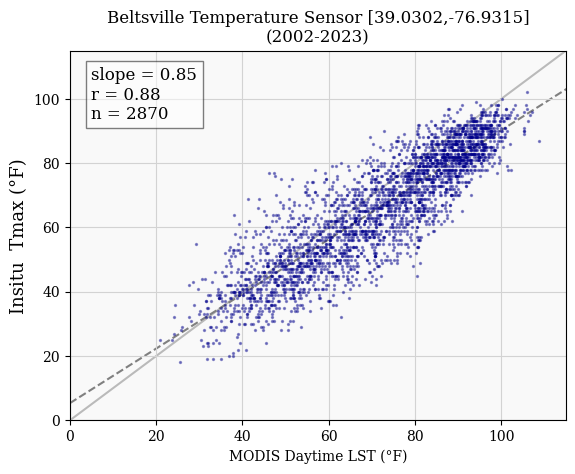

In [110]:
#Scatterplot
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
myLocation = 'Oxon Hill'
insitu_df_daily = insitu_df #oxon_hill_df.dropna()

# set to Times New Roman
rcParams['font.family'] = 'serif'

from scipy.stats import linregress
merged_df = pd.merge(df_merged, insitu_df_daily, on='date', how='inner').dropna()
plt.grid(zorder = 1, c = 'lightgrey')
plt.axvspan(0,150, color='whitesmoke', alpha=0.5)
plt.scatter(merged_df['average'], merged_df['Tmax'],zorder = 2, s = 2, c = 'darkblue', alpha = .4)
plt.ylabel('Insitu  Tmax (°F)',fontsize = 13)
plt.xlabel('MODIS Daytime LST (°F)')
#linregreess
slope, intercept, r_value, p_value, std_err = linregress(merged_df['average'], merged_df['Tmax'])
x_range = pd.Series([0, 150])
y_values = intercept + slope * x_range
plt.plot(x_range, y_values, color='grey', linestyle = '--', label=f'Linear regression line (y={slope:.2f}x+{intercept:.2f})',zorder = 1)

# Plot the y=x line
plt.plot([0, 150], [0, 150], color='grey', linestyle='-',zorder = 0)
cleaned_df = merged_df.dropna(subset=['Tmax', 'average'])

# got non nan
count = len(cleaned_df)
#plt.title(f'{myLocation} Temperature Sensor {coord_dict[myLocation]}\n(2002-2021)')
plt.title(f'Beltsville Temperature Sensor [39.0302,-76.9315]\n(2002-2023)')
#plt.title(f'Marlboro Temperature Sensor [38.8519,-76.7683]\n(2002-2016)')
textstr = f'slope = {slope:.2f}\nr = {r_value:.2f}\nn = {len(cleaned_df)}'
plt.text(5, 110, textstr, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

#plt.ylim(30,95)
plt.xlim(0,115)
plt.ylim(0,115)
plt.savefig(f'/panfs/ccds02/nobackup/people/slsmit34/Satellite/Personal_data/MODIS_LST/plots/png/{TOD}_daily_validation_BELTSVILLE.png', format='png', dpi=300)